# Mesure d'un temps au chronomètre

### Objectif  
Nous allons chercher à quantifier l'impact qu'à un expérimentateur sur un processus de mesure de temps, notament déterminer l'incertitude-type liée à celle-ci. 



<div class="alert alert-block alert-info">
    <big><b> Consignes </b></big> 

<ol>
	<li> Rendez-vous sur le site https://chronometre.minuteur-en-ligne.fr/chronometre-temps-intermediaires.</li>
	<li> Cliquez sur "Démarrer" puis, toutes les 2 secondes, cliquez sur mémoriser (le but est d'être le plus "précis" possible).</li>
	<li> Au bout de 2 minutes cliquez sur arrêter. </li>
	<li> Vérifiez que vous n'avez pas fait de temps intermédiaires supérieurs à 3 secondes ou inférieurs à 1 seconde, sinon recommencez. Le dernier temps peut être supprimé si nécessaire.</li>
	<li> Téléchargez au format .txt votre mesure.</li>
	<li> Placez ce fichier dans le dossier contenant ce bloc note Jupyter.</li>
	<li> Renommez ce fichier en << chrono_[numero].txt >>, le numéro étant donné par l'enseignant.</li>
	<li> Lancez le code ci-dessous.</li>
</ol>
</div>

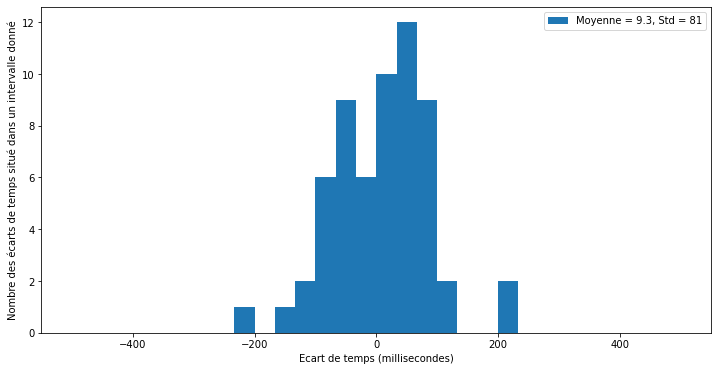

In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt

#utiliser "chrono_[numero].txt"
File = pd.read_csv(r'chrono_1.txt', delimiter="\t", header = None) # récupération du fichier txt (3ème colonne temps)
#File = pd.read_csv(r'.\chronometre\chrono_2s_b.txt', delimiter="\t", header = None) # récupération du fichier txt (3ème colonne temps)
temps = File.to_numpy() # fichier converti en tableau

Dt = [] #Différence entre temps expérimental et temps théorique (pris toutes les 2 secondes)   
for i in range(np.size(temps,0)-1):
    t = temps[i,2] #récupération de la colonne des temps en format str
    Dt.append(float(t[3:5])*60*1000+float(t[6:8])*1000+float(t[9:13])-(i+1)*2000) #conversion en millisecondes et calcul de différence

#tracé d'un histogramme de la différence des temps (doit être normalement centré sur 0) 
plt.figure(figsize=(12,6))    
plt.hist(Dt,range=(-500,500),bins=30,label='Moyenne = {:.1f}, Std = {:.0f}'.format(np.mean(Dt),np.std(Dt,ddof=1)))
plt.xlabel('Ecart de temps (millisecondes)')
plt.ylabel('Nombre des écarts de temps situé dans un intervalle donné')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
    <big><b> Questions </b></big> 

<ol>
	<li> Quel est la valeur moyenne obtenue par votre processus de mesure ? Que vaut l'écart-type ? </li>
    <li> Notez le résultat de votre mesure en respectant la forme $\overline{t} = ... ; u(\overline{t}) = ... $ où $u(\overline{t})$ représente l'incertitude-type associée au processus de mesure de $\overline{t}$, soit l'écart-type divisé par la racine carré du nombre de valeurs enregistrées. </li>
</ol>
</div>

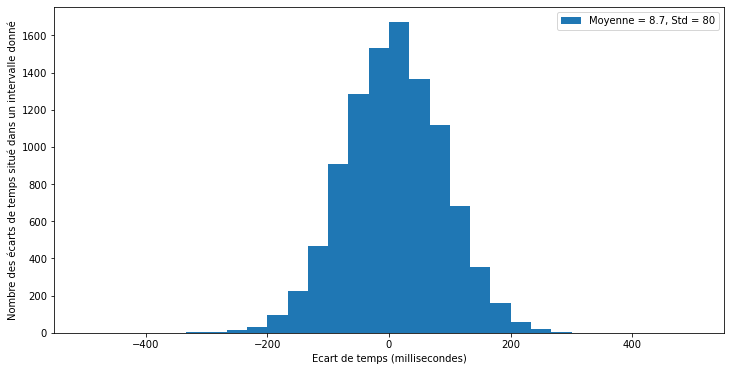

0.8055608987419393


In [2]:
Dt_MC = np.random.normal(np.mean(Dt),np.std(Dt,ddof=1),size=(10000,1)) #ddof : degrés de liberté => calcul du std avec "N-1"
plt.figure(figsize=(12,6))    
plt.hist(Dt_MC,range=(-500,500),bins=30,label='Moyenne = {:.1f}, Std = {:.0f}'.format(np.mean(Dt_MC),np.std(Dt_MC,ddof=1)))
plt.xlabel('Ecart de temps (millisecondes)')
plt.ylabel('Nombre des écarts de temps situé dans un intervalle donné')
plt.legend()
plt.show()
print(np.std(Dt,ddof=1)/np.sqrt(10000))